


# Econometrics Experiment Activity:

with your group suggest and research one question that can be anserwed using economic or market data.

Research Question: Investigating the relation between stock price and price of oil
   
Dependent Variable:
  Closing stock price 

Indepdendent Variable(s):
  Brent Oil Prices
    
Data sources:
 https://www.kaggle.com/mabusalah/brent-oil-prices
 yahoo finance of (Antero Midstream)
    
    
    
Group Number #: 6
    
    
Group Members #:
    1. Hussein Ali Buhligah
    2. Afrah AlHarbi
    3. Reem AlQhatani
    4. Ahmed ALGhazal
    

In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

In [63]:
brent_oil_price = df = pd.read_csv("BrentOilPrices.csv",
                                   parse_dates=["Date"],
                                   index_col=["Date"])
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [64]:
AM_stock = pd.read_csv("AM.csv",
                       parse_dates=["Date"],
                       index_col=["Date"])
AM_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,19.750000,20.805000,19.750000,20.709999,13.251207,2259800
2018-01-03,20.820000,21.309999,20.790001,21.000000,13.436765,2194500
2018-01-04,21.049999,21.049999,20.620001,20.930000,13.391974,1456100
2018-01-05,21.299999,21.559999,20.480000,20.809999,13.315194,1162300
2018-01-08,20.750000,20.840000,20.430000,20.600000,13.180825,1289500


In [65]:
df = pd.merge(left=AM_stock,
              right=brent_oil_price,
              how="inner",
              right_index=True,
              left_index=True)
df = df.rename(columns={'Price': 'Oil Price'})
df.head()

,Open,High,Low,Close,Adj Close,Volume,Oil Price
Date,,,,,,,
2018-01-02,19.750000,20.805000,19.750000,20.709999,13.251207,2259800,66.65
2018-01-03,20.820000,21.309999,20.790001,21.000000,13.436765,2194500,67.85
2018-01-04,21.049999,21.049999,20.620001,20.930000,13.391974,1456100,68.73
2018-01-05,21.299999,21.559999,20.480000,20.809999,13.315194,1162300,68.01
2018-01-08,20.750000,20.840000,20.430000,20.600000,13.180825,1289500,68.48


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2018-01-02 to 2020-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       748 non-null    float64
 1   High       748 non-null    float64
 2   Low        748 non-null    float64
 3   Close      748 non-null    float64
 4   Adj Close  748 non-null    float64
 5   Volume     748 non-null    int64  
 6   Oil Price  748 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 46.8 KB


In [67]:
regressor = sm.OLS(df["Close"], df["Oil Price"]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              7337.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:16:23   Log-Likelihood:                         -2054.6
No. Observations:                 748   AIC:                                      4111.
Df Residuals:                     747   BIC:                                      4116.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
predctions = regressor.predict(df["Oil Price"])

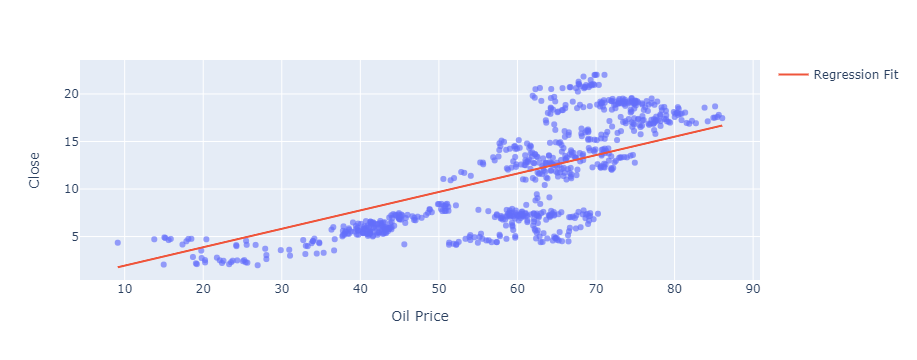

In [69]:
fig = px.scatter(df, x='Oil Price', y='Close', opacity=0.65)
fig.add_traces(go.Scatter(x=df["Oil Price"],
                          y=predctions,
                          name='Regression Fit'))
fig.show()

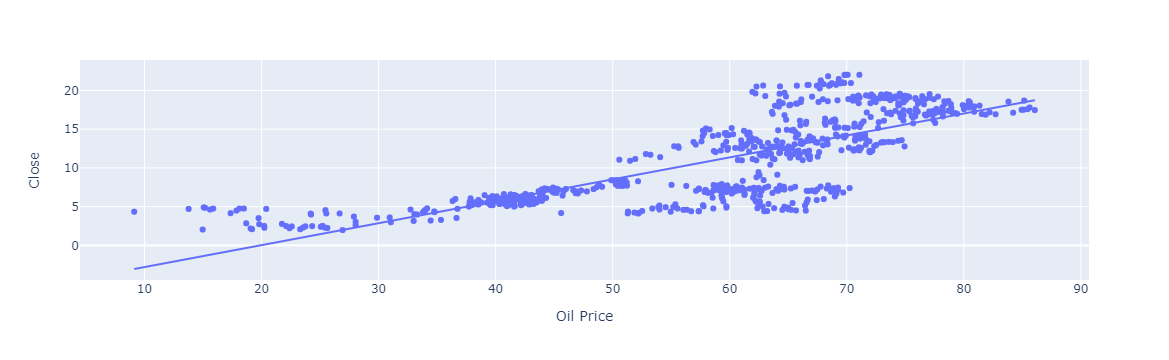

In [72]:
fig = px.scatter(df, x='Oil Price', y='Close', trendline="ols")
fig.show()